## 1.6 Nearest Neighbors

`sklearn.neighbors` provides functionality for unsupervised and supervised neighbors-based learning methods. Unsupervised nearest neighbors is the foundation of many other learning methods. Supervised neighbors-based learning comes as **classification** for data with discrete labels and **regression** for data with continuous labels.

The principle behind these methods is to find a predetermined number of training samples closest in distance to the new point and predict the label from these. The number of samples can be user-defined, or vary based on the local density of points. 

Neighbors-based methods are *non-generalizing* ML methods since they simply remember all the training data.

Nearest neighbor algorithms have been successful in a large number of classification and regression problems, including (e.g.) handwritten digits and satellite images. And because it's a *non-parametric* method, it is often successful in classification situations where the decision boundary is very irregular.

The classes in `sklearn.neighbors` can handle either NumPy arrays or `scipy.sparse` matrices as input. For dense matrices, many distance metrics are supported. For sparse matrices, arbitrary Minkowski metrics are supported for searches.

### 1.6.1 Unsupervised Nearest Neighbors

`NearestNeighbors` implements unsupervised NN learning, acting as a uniform interface to three different NN algorithms:
* `BallTree`
* `KDTree`
* And a brute-force algorithm based on routines in `sklearn.metrics.pairwise`

Note that if two neighbors `k+1` and `k` have identical distances but different labels, the result will depend on the ordering of data.

The choice of NN search algorithm is controlled as one of:
* `algorithm='auto'`
* `algorithm='ball_tree'`
* `algorithm='kd_tree'`

#### 1.6.1.1 Finding the Nearest Neighbors
Example

In [1]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

In [2]:
X = np.array([[-1,-1],[-2,-1],[-3,-2],[1,1],[2,1],[3,2]])
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)

In [3]:
distances, indices = nbrs.kneighbors(X)

In [4]:
indices

array([[0, 1],
       [1, 0],
       [2, 1],
       [3, 4],
       [4, 3],
       [5, 4]], dtype=int64)

In [5]:
distances

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.41421356],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.41421356]])

Because the query matches the training set, the nearest neighbor of each point is the point itself as a distance of 0. You can also efficiently make a sparse graph showing connections between neighbors:

In [6]:
nbrs.kneighbors_graph(X).toarray()

array([[1., 1., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 0., 1., 1.]])

The dataset is structured so that nearby points in index order are also nearby in parameter space, so you get an approximate block-diagonal matrix of K-nearest neighbors.

#### 1.6.1.2 KDTree and BallTree Classes

You can also use classes `KDTree` or `BallTree` directly to find nearest neighbors.

In [7]:
from sklearn.neighbors import KDTree
import numpy as np

In [9]:
X = np.array([[-1,-1],[-2,-1],[-3,-2],[1,1],[2,1],[3,2]])

kdt = KDTree(X, leaf_size = 30, metric='euclidean')
kdt.query(X, k=2, return_distance = False)

array([[0, 1],
       [1, 0],
       [2, 1],
       [3, 4],
       [4, 3],
       [5, 4]], dtype=int64)

More on `KDTree`: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KDTree.html#sklearn.neighbors.KDTree

More on `BallTree`: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.BallTree.html#sklearn.neighbors.BallTree

### 1.6.2 Nearest Neighbor Classification

Neighbors-based classification is a type of **instance-based learning** or **non-generalizing learning** which doesn't try to construct a general internal model, but rather stores instance of the training data. Classification is then computed from a simple majority vote of the nearest neighbors of each point.

scitkit-learn implements two different NN classifiers:
* `KNeighborsClassifier`
    * based on `k` nearest neighbors of each query point
* `RadiusNeighborsClassifier`
    * based on number of neighbors within a fixed radius `r` of each training point

`KNeighborsClassifier` (KNC) is more commonly used than `RadiusNeighborsClassifier` (RNC) because in general a larger `k` suppresses noise but it also makes the classification boundaries less distinct. When the data is not uniformly sampled, radius-based neighbors classification in RNC can be a better choice. The user specifies a radius `r` such that points in sparser neighborhoods use fewer neighbors for classification. This is less effective for high-dimensional parameter spaces due to the *curse of dimensionality*

The weight of each point can be `weight='uniform'` or `weight='distance'` or user-defined

###### Example - Nearest Neighbors Classification

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

In [11]:
n_neighbors = 15

#import data and set X & y
iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

In [12]:
#set mesh step size
h = 0.02

#copypasta
# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

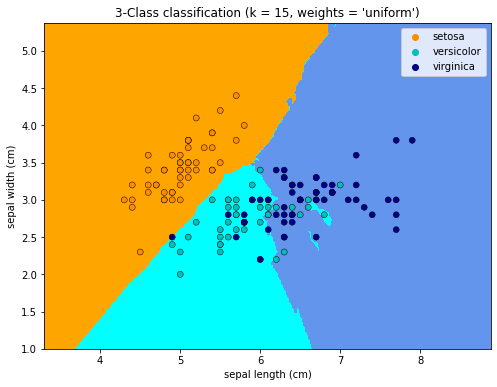

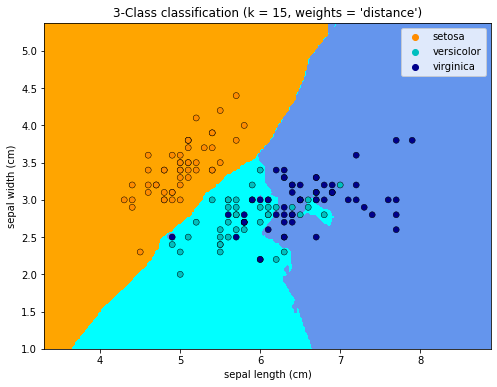

In [13]:
#copypasta
for weights in ["uniform", "distance"]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=iris.target_names[y],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(
        "3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights)
    )
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])

plt.show()

### 1.6.3 Nearest Neighbors Regression

Neighbors-based regression is for continuous data, and the label assigned to a query point is computed based on the mean of the labels of its nearest neighbors

Similar to classification, scikit-learn implements two different neighbors regressors:
* `KNeighborsRegressor`
* `RadiusNeighborsRegressor`

###### Example - Nearest Neighbors Regression

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

In [17]:
#generate sample data
np.random.seed(0)

X = np.sort(5 * np.random.rand(40,1), axis = 0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

In [20]:
#add noise to targets
y[::5] += 1 * (0.5 - np.random.rand(8))

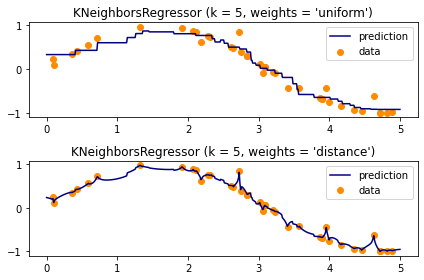

In [21]:
#fit regression model
n_neighbors = 5

for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X,y).predict(T)
    
    #copypasta
    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, color="darkorange", label="data")
    plt.plot(T, y_, color="navy", label="prediction")
    plt.axis("tight")
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, weights))

plt.tight_layout()
plt.show()

###### Example - Face completion with a multi-output estimators

In [22]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.utils.validation import check_random_state

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

In [35]:
#load the faces datasets
data, targets = fetch_olivetti_faces(return_X_y=True)

train = data[targets < 30]
test = data[targets >= 30] #test on independent people

In [36]:
#test on a subset of people
n_faces = 5
rng = check_random_state(4)

face_ids = rng.randint(test.shape[0], size=(n_faces,))
test = test[face_ids, :]

In [37]:
n_pixels = data.shape[1]

#upper half of faces
X_train = train[:, : (n_pixels + 1) // 2]
#lower half
y_train = train[:, n_pixels // 2 :]
X_test = test[:, : (n_pixels + 1) // 2]
y_test = test[:, n_pixels // 2 :]

In [42]:
#fit estimators
ESTIMATORS = {
    'Extra trees': ExtraTreesRegressor(n_estimators=10, max_features=32, random_state=0),
    "KNN": KNeighborsRegressor(),
    "Linear regression": LinearRegression(),
    'Ridge' : RidgeCV(),
}

In [43]:
y_test_predict = dict()

for name, estimator in ESTIMATORS.items():
#    estimator.fit(X_train, y_train)
    estimator.fit(X_train, y_train)
    y_test_predict[name] = estimator.predict(X_test)

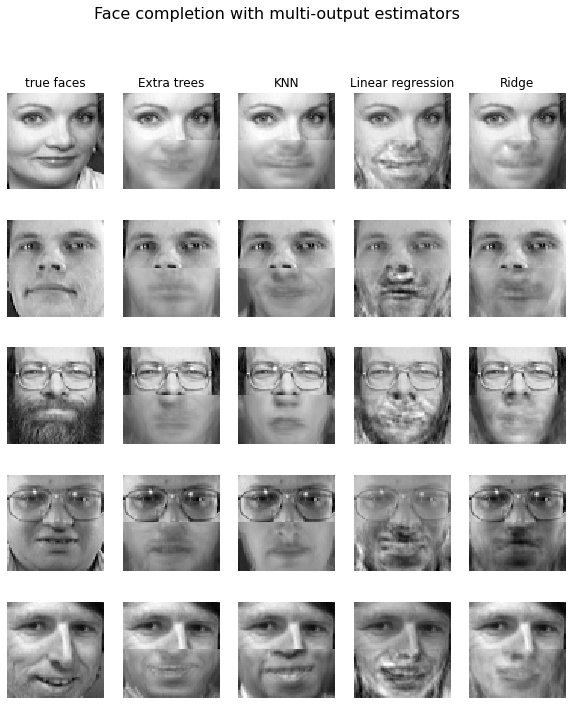

In [44]:
#copypasta
# Plot the completed faces
image_shape = (64, 64)

n_cols = 1 + len(ESTIMATORS)
plt.figure(figsize=(2.0 * n_cols, 2.26 * n_faces))
plt.suptitle("Face completion with multi-output estimators", size=16)

for i in range(n_faces):
    true_face = np.hstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")

    sub.axis("off")
    sub.imshow(
        true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest"
    )

    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], y_test_predict[est][i]))

        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)

        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j, title=est)

        sub.axis("off")
        sub.imshow(
            completed_face.reshape(image_shape),
            cmap=plt.cm.gray,
            interpolation="nearest",
        )

plt.show()

### 1.6.4 Nearest Neighbor Algorithms

#### 1.6.4.1 Brute Force
Brute force effectively involves computing distances between all pairs of points in the dataset which is not efficient.

Efficient brute force searches are competitive for small data samples but infeasible for larger data.

For classes within `sklearn.neighbors`, brute force is specified by `algorithm='brute'`

#### 1.6.4.2 K-D Tree

The **K-Dimensional Tree** or `KDTree` algorithm is a binary tree structure. It recursively partitions the parameter space along the data axes. Construction of a KD-tree is very fast because partitioning is performed only along the data axes so no D-dimensional distances need to be computed.

This is efficient for low-dimensional (D < 20) neighbor searches, but inefficient as D grows large.

scikit-learn specifies KD Tree Neighbor Searches using `algorithm = 'kd_tree'`

#### 1.6.4.3 Ball Tree

The **ball tree** data structure was developed to address the inefficiencies of KD Trees in higher dimensions, which partitions data along Cartesian coordinates. Instead, ball trees partition data in a series of nesting hyper-spheres.

Ball tree construction is more costly than KD trees, but it creates a data structure that's efficient on highly structured data even in high dimensions.

A ball tree recursively divides the data into nodes defined by a centroid $C$ and radius $r$, such that each point in the mode lies within the hypersphere defined by $r$ and $C$. The number of candidate points is somehow reduced by the triangle inequality:  $|x+y| \le |x|+|y|$

scikit-learn specifies Ball Tree Neighbor Searches using `algorithm = 'ball_tree'`

#### 1.6.4.4 Choice of Nearest Neighbors Algorithm

Choosing the optimal algorithm depends on many factors:
* number of samples $N$ (i.e. `n_samples`) and dimensionality $D$
    * **Brute force** grows as $O[DN]$
    * **Ball tree** grows as $O[D\log(N)]$
    * **KD tree** changes with $D$ in a difficult way
        * ranges from $O[D\log(N)]$ to $O[DN]$      

* For small data sets, N = 30 or so, brute force algorithms can be more efficient than tree-based ones. Both `KDTree` and `BallTree` have a `leaf_size=` parameter which allow them to approach brute force efficiency for small N

* Data structure: *intrinsic dimensionality* and *sparsity* of the data.
    * **Brute force** unchanged by data structure
    * **Ball tree** and **KD tree** are greatly influenced by data structure, sparser data with smaller intrinsic dimensionality leads to faster query times. KD tree will not show as much improvement as ball tree for arbitrarily structured data.

* Datasets used in ML tend to be very structured and well-stuied for tree-based queries

* Number of neighbors $k$ requested for a query point
    * **Brute force** mostly unaffected by $k$
    * **Ball tree** and **KD tree** become slower as $k$ increases
    - as $k$ becomes large compared to $N$, brute force queries can be more efficient

* number of query points

#### 1.6.4.5 Effect of `leaf_size`

**construction time**
- A larger `leaf_size` leads to faster tree construction time because fewer nodes are needed

**query time**
- For `leaf_size` approaching 1, overhead can slow query times. For `leaf_size` approaching size of the training set, queries become essentially brute force. Default value is `leaf_size=30`

**memory**
- As `leaf_size` increases, memory required to store a tree structure decreases. Required storage space for `BallTree` is approximately `1 / leaf_size` times the size of the training set

#### 1.6.4.6 Valid Metrics for Nearest Neighbor Algorithms

In [46]:
from sklearn.neighbors import KDTree

print(sorted(KDTree.valid_metrics))

['chebyshev', 'cityblock', 'euclidean', 'infinity', 'l1', 'l2', 'manhattan', 'minkowski', 'p']


In [47]:
from sklearn.neighbors import BallTree

print(sorted(BallTree.valid_metrics))

['braycurtis', 'canberra', 'chebyshev', 'cityblock', 'dice', 'euclidean', 'hamming', 'haversine', 'infinity', 'jaccard', 'kulsinski', 'l1', 'l2', 'mahalanobis', 'manhattan', 'matching', 'minkowski', 'p', 'pyfunc', 'rogerstanimoto', 'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'wminkowski']


### 1.6.5 Nearest Centroid Classifier

The `NearestCentroid` classifier is a simple algorithm, it represents each class by the centroid of its members. It also has no parameters to choose, making it a good baseline classifier.

In [49]:
from sklearn.neighbors import NearestCentroid
import numpy as np

In [50]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([1, 1, 1, 2, 2, 2])

In [51]:
clf = NearestCentroid()
clf.fit(X,y)

NearestCentroid()

In [53]:
print(clf.predict([[-0.8,-1]]))

[1]


#### 1.6.5.1 Nearest Shrunken Centroid

The `NearestCentroid` classifier has a `shrink_threshold` parameter, which implements the nearest shrunken centroid classifier. This can be useful for removing noisy features.

###### Example - Nearest Centroid Classification

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import datasets
from sklearn.neighbors import NearestCentroid

In [55]:
n_neighbors = 15

iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

None 0.8133333333333334


<ipython-input-56-bcede19c9b59>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


0.2 0.82


<ipython-input-56-bcede19c9b59>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


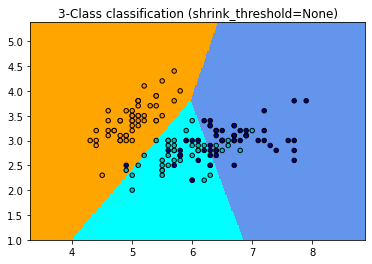

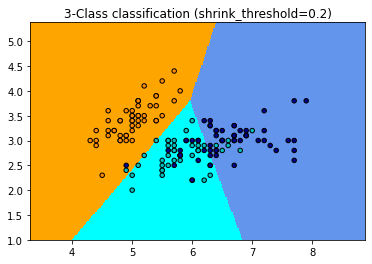

In [56]:
#copypasta
h = 0.02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ListedColormap(["darkorange", "c", "darkblue"])

for shrinkage in [None, 0.2]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = NearestCentroid(shrink_threshold=shrinkage)
    clf.fit(X, y)
    y_pred = clf.predict(X)
    print(shrinkage, np.mean(y == y_pred))
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor="k", s=20)
    plt.title("3-Class classification (shrink_threshold=%r)" % shrinkage)
    plt.axis("tight")

plt.show()

### 1.6.6 Nearest Neighbors Transformer

Many scikit-learn estimators use nearest neighbors:
* `KNeighborsClassifier`
* `KNeighborsRegressor`
* `DBSCAN` (cluster)
* `SpectralClustering` (cluster)
* `TSNE` (manifold)
* `Isomap` (manifold)

In [58]:
import tempfile

from sklearn.manifold import Isomap
from sklearn.neighbors import KNeighborsTransformer
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_regression

In [59]:
cache_path = tempfile.gettempdir()

X, _ = make_regression(n_samples=50, n_features=25, random_state=0)

estimator = make_pipeline(KNeighborsTransformer(mode='distance'),
                          Isomap(n_components=3, metric='precomputed'),
                          memory=cache_path)

In [60]:
X_embedded = estimator.fit_transform(X)
X_embedded.shape

(50, 3)

###### Example - Approximate nearest neighbors in TSNE

https://scikit-learn.org/stable/auto_examples/neighbors/approximate_nearest_neighbors.html#sphx-glr-auto-examples-neighbors-approximate-nearest-neighbors-py

###### Example - Caching nearest neighbors
https://scikit-learn.org/stable/auto_examples/neighbors/plot_caching_nearest_neighbors.html#sphx-glr-auto-examples-neighbors-plot-caching-nearest-neighbors-py

### 1.6.7 Neighborhodd Components Analysis

`NeighborhoodComponentsAnalysis` (NCA) is a distance metric learning algorithm which tries improving its NN classification compared to the standard Euclidean distance. It directly maximizes a stochastic variant of leave-one-out k-nearest neighbors (KNN) score on the training set.

It can also learn a low-dimensional linear projection of data for fast visualization and classification.

#### 1.6.7.1 Classification

Combined with an NN classifier like `KNeighborsClassifier`, NCA naturally handles multi-class problems without increase in model size and without introducing parameters that need tuning.

NCA does not make any assumptions about class distributions, unlike related methods like Linear Discriminant Analysis. 

To use this model for classification, combine NCA instance that learns the optimal transformation with a KNC instance that performs the classification in the projected space:

Example

In [61]:
from sklearn.neighbors import NeighborhoodComponentsAnalysis, KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [62]:
X, y = load_iris(return_X_y = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, 
                                                    test_size=0.7, random_state=42)

In [64]:
nca = NeighborhoodComponentsAnalysis(random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)

nca_pipe = Pipeline([('NCA', nca), ('KNN', knn)])
nca_pipe.fit(X_train, y_train)

Pipeline(steps=[('NCA', NeighborhoodComponentsAnalysis(random_state=42)),
                ('KNN', KNeighborsClassifier(n_neighbors=3))])

In [65]:
print(nca_pipe.score(X_test, y_test))

0.9619047619047619


#### 1.6.7.2 Dimensionality reduction

NCA can perform supervised dimensionality reduction, here the desired dimensionality is set by the parameter `n_components`.

###### Example - Comparing Nearest neighbors with and without Neighborhood Components Analysis

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.pipeline import Pipeline

In [67]:
n_nighbors = 1

dataset = datasets.load_iris()
X, y = dataset.data, dataset.target

In [68]:
X = X[:, [0,2]]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    test_size=0.7, random_state=4)

h = 0.01 #mesh step size

In [69]:
#copypasta
# Create color maps
cmap_light = ListedColormap(["#FFAAAA", "#AAFFAA", "#AAAAFF"])
cmap_bold = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])

In [70]:
names = ['KNN', 'NCA', 'KNN']

classifiers = [
    Pipeline([
        ('scaler', StandardScaler()),
        ('KNN', KNeighborsClassifier(n_neighbors=n_neighbors))
    ]),
    Pipeline([
        ('scaler', StandardScaler()),
        ('NCA', NeighborhoodComponentsAnalysis()),
        ('KNN', KNeighborsClassifier(n_neighbors=n_neighbors))
    ])
]

<ipython-input-71-17ca90c76165>:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha=0.8)
<ipython-input-71-17ca90c76165>:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha=0.8)


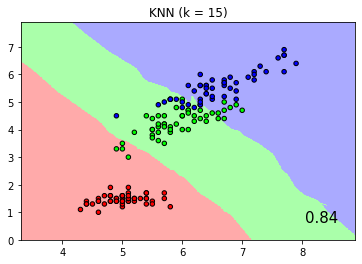

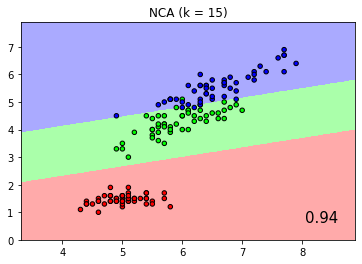

In [71]:
#copypasta
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

for name, clf in zip(names, classifiers):

    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha=0.8)

    # Plot also the training and testing points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor="k", s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("{} (k = {})".format(name, n_neighbors))
    plt.text(
        0.9,
        0.1,
        "{:.2f}".format(score),
        size=15,
        ha="center",
        va="center",
        transform=plt.gca().transAxes,
    )

plt.show()

###### Example - Dimensionality Reduction with Neighborhood Components Analysis

In [72]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [73]:
n_neighbors = 3
random_state = 0

In [74]:
X, y = datasets.load_digits(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,
                                                    stratify=y, random_state=random_state)

In [75]:
dim = len(X[0])
n_classes = len(np.unique(y))

In [76]:
#reduce dimension to 2 with PCA
pca = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis(n_components=2))

#reduce dimension to 2 using LDA
lda = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis(n_components=2))

#reduce dimension to 2 with NCA
nca = make_pipeline(StandardScaler(), 
                NeighborhoodComponentsAnalysis(n_components=2, random_state=random_state))

In [77]:
#use NN classifier to evaluate methods
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

#list of methods to be compared
dim_reduction_methods = [("PCA", pca),("LDA", lda),("NCA", nca)]

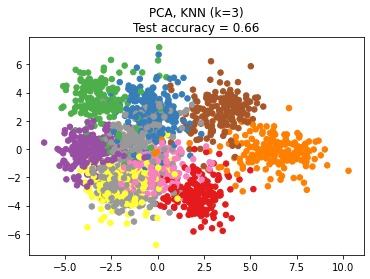

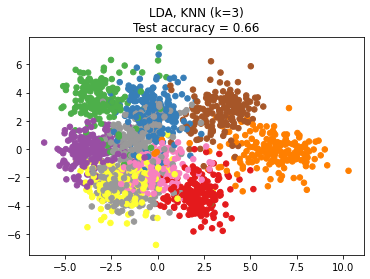

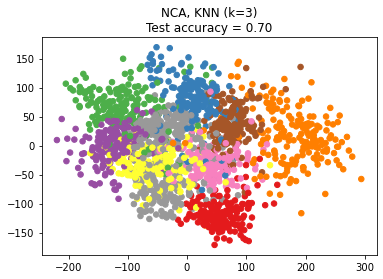

In [78]:
for i, (name, model) in enumerate(dim_reduction_methods):
    plt.figure()
    
    #fit method model
    model.fit(X_train, y_train)
    
    #fit and score NN model
    knn.fit(model.transform(X_train), y_train)
    acc_knn = knn.score(model.transform(X_test), y_test)
    
    #embed the dataset in 2 dimensions using the fiteed model
    X_embedded = model.transform(X)
    
    #copypasta
    # Plot the projected points and show the evaluation score
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, s=30, cmap="Set1")
    plt.title(
        "{}, KNN (k={})\nTest accuracy = {:.2f}".format(name, n_neighbors, acc_knn)
    )
plt.show()

###### Example - Manifold learning on handwritten digits: Locally Linear Embedding, Isomap...
https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html#sphx-glr-auto-examples-manifold-plot-lle-digits-py

#### 1.6.7.3 Mathematical formulation

##### 1.6.7.3.1 Mahalanobis distance

#### 1.6.7.4 Implementation

#### 1.6.7.5 Complexity

#### 1.6.7.5.1 Training

#### 1.6.7.5.2 Transform